In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline

In [30]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [31]:
init_notebook_mode(connected=True)
cf.go_offline()

In [32]:
df=pd.read_csv('CRUDEPALMKERNELOIL.csv')

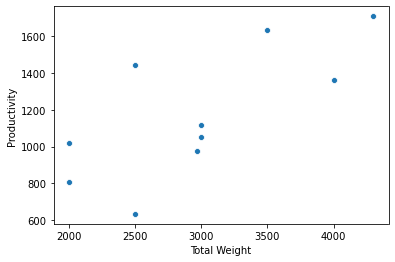

In [33]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [34]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,9.000000
mean,145.800000,193681.800000,32.991000,59.009000,2976.367700,0.028000,0.002800,0.0,0.505000,24.903000,1175.957000,20212.777778
std,56.644702,3670.331708,36.753567,90.627976,777.115836,0.007888,0.000789,0.0,1.335417,61.228084,351.921485,9746.730667
min,37.000000,190838.000000,0.000000,0.000000,1999.960000,0.020000,0.002000,0.0,0.000000,0.000000,632.690000,2497.000000
25%,130.000000,191551.500000,0.000000,0.000000,2499.928000,0.020000,0.002000,0.0,0.000000,0.000000,988.037500,15723.000000
50%,161.000000,192339.500000,23.490000,24.125000,2982.136500,0.030000,0.003000,0.0,0.000000,0.000000,1085.340000,18290.000000
75%,183.750000,192992.750000,60.110000,78.995000,3374.894000,0.030000,0.003000,0.0,0.052500,10.275000,1423.850000,30828.000000
max,210.000000,200855.000000,94.830000,291.280000,4299.798000,0.040000,0.004000,0.0,4.250000,195.330000,1710.420000,31893.000000


In [35]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [36]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [37]:
print(lm.intercept_)

157.6161320121994


In [38]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.330287


In [39]:
predictions = lm.predict(X_test)

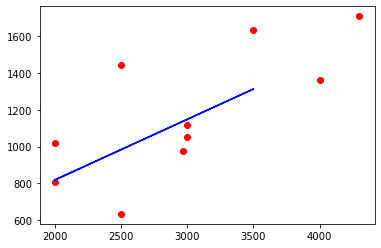

In [40]:
plt.scatter(X,y,color='red')
plt.plot(X_test,predictions,color='blue')

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 173.55148591793306
MSE: 42380.57327410343
RMSE: 205.86542515464666
r2_score: 0.5668085159558814


In [44]:
joblib.dump(lm,"Crude_Palm_Kernal_Oil.pkl")

['Crude_Palm_Kernal_Oil.pkl']